In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("placement-dataset.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

Steps we'll do:
 1. Preprocessing + EDA + Feature Selection
 2. Extract Input and Output columns 
 3. Scale the values 
 4. Train test split 
 5. Train the model 
 6. Evaluate the model/model selection
 6. Deploy the model


In [6]:
df = df.iloc[:,1:]

### Preprocess

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### EDA

In [8]:
import matplotlib.pyplot as plt 

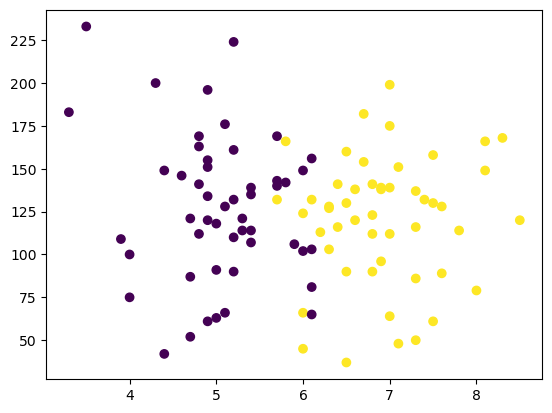

In [9]:
plt.scatter(df["cgpa"] , df["iq"] , c=df["placement"])
plt.show()

### Extract Input and Output

In [10]:
X = df.iloc[: , 0:2]
y = df.iloc[: , -1]
print(X) 
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.1)

In [12]:
X_train

,cgpa,iq
53,8.3,168.0
34,4.8,163.0
20,6.6,120.0
57,6.5,130.0
0,6.8,123.0
...,...,...
46,5.3,114.0
71,6.1,132.0
94,4.7,52.0
1,5.9,106.0


In [13]:
y_train

53    1
34    0
20    1
57    1
0     1
     ..
46    0
71    1
94    0
1     0
18    0
Name: placement, Length: 90, dtype: int64

### Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
X_train

array([[ 1.97093286,  1.07205131],
       [-0.99819125,  0.94635483],
       [ 0.52878686, -0.1346349 ],
       [ 0.44395475,  0.11675806],
       [ 0.6984511 , -0.05921701],
       [-0.48919854, -0.28547067],
       [ 1.29227592,  0.11675806],
       [-0.82852701, -1.56757477],
       [ 0.01979416, -1.49215688],
       [-2.10100877,  2.70610556],
       [-0.99819125, -0.33574926],
       [-0.65886278, -0.88881378],
       [-2.270673  ,  1.44914075],
       [ 0.6984511 , -0.88881378],
       [-1.33751972,  0.59440469],
       [ 1.12261168,  0.29273314],
       [ 1.29227592,  0.82065835],
       [ 0.6984511 , -0.33574926],
       [-0.48919854,  0.34301173],
       [-0.91335913,  0.21731525],
       [ 2.14059709, -0.1346349 ],
       [ 0.35912263,  0.39329032],
       [ 1.2074438 ,  0.16703666],
       [-0.91335913,  1.7759516 ],
       [-0.23470219,  1.09719061],
       [-1.67684818, -1.26590322],
       [-0.91335913, -0.1346349 ],
       [ 0.10462628, -1.51729618],
       [ 1.12261168,

In [16]:
X_test = scaler.transform(X_test)


In [17]:
X_test

array([[ 0.86811533, -1.54243548],
       [ 0.44395475, -0.88881378],
       [ 0.1894584 , -0.31060997],
       [ 0.10462628,  0.77037976],
       [ 0.44395475, -2.22119647],
       [ 0.78328322, -0.737978  ],
       [-0.48919854,  0.24245454],
       [ 0.27429051,  0.04134018],
       [-0.48919854, -0.46144575],
       [-0.91335913,  0.64468328]])

### Train the Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()     #clf has the power to access all the functions of LogisticRegrrssion

In [20]:
clf.fit(X_train , y_train)           # we use .fit() to train the model just give training dataset to it.

LogisticRegression()

### Evaluate the Model 

In [21]:
y_pred = clf.predict(X_test)

In [22]:
(y_test)

64    1
79    1
99    1
8     0
82    1
66    1
49    0
70    1
81    0
89    0
Name: placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score


In [24]:
accuracy_score(y_test , y_pred)

0.9

In [27]:
import sys
print(sys.executable)


c:\ProgramData\anaconda3\python.exe


In [3]:
import sys
!{sys.executable} -m pip install mlxtend



Defaulting to user installation because normal site-packages is not writeable
  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached numpy-2.4.2-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached pandas-3.0.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--


ERROR: Exception:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^

In [ ]:
pip install mlxtend

import mlxtend
print(mlxtend.__version__)

from mlxtend.plotting import plot_decision_regions


ModuleNotFoundError: No module named 'mlxtend'